In [6]:
import numpy as np
import matplotlib.pylab as plt

In [100]:
def phi(x):
    phi = np.piecewise(x, [x <= -1,
                     (x > -1)&(x<0),
                     (x >= 0)&(x < 1),
                      x >= 1],
                    [0,
                     lambda x: x+1,
                     lambda x: -x+1,
                     0])
    return phi

def Phi(x):
    Phi = np.piecewise(x, [x <= -1,
                     (x > -1)&(x<0),
                     (x >= 0)&(x < 1),
                      x >= 1],
                    [0,
                     lambda x: .5*(x+1)**2,
                     lambda x: -.5*(x-1)**2 + 1,
                     1])
    return Phi

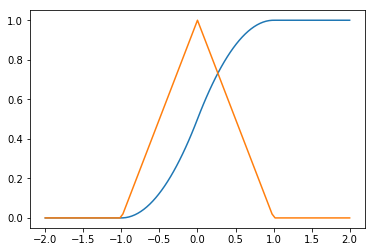

In [101]:
x = np.linspace(-2, 2, 103)
plt.plot(x, Phi(x));
plt.plot(x, phi(x));

In [102]:
L = 120 # mm, length of the plates
gap = .3 #mm, gap between plates
plate = .4 # mm, thickness

R = 340 # mm, gonio center to plates distance
z0 = .01

beam_width = 2.4 # mm, overestimation of the beam footprint

In [103]:
def intervalles(theta, z0=0):
    shadow = L*np.sin(theta) + plate*np.cos(theta)
    period = (gap + plate)*np.cos(theta)
    through = period - shadow
    
    offset = theta*R + z0
    return period, through, offset

In [184]:
intervalles(-.0004)

(0.6999999440000007, 0.3479999747200002, -0.136)

In [186]:
def A(theta, k, i_max, dz, z0):

    period, through, offset = intervalles(theta, z0=z0)
    i_range = np.arange(-i_max, +i_max+1)
    
    return np.sum(  phi((i_range*period + through + offset)/dz - k)\
                  - phi((i_range*period + offset)/dz - k))*dz

In [205]:
i_max = np.ceil(beam_width/2/(gap+plate)) + 10

dz = .03
z0 = 0

theta = 0.004
k = 2
A(theta, k, i_max, dz, z0)

0.0

In [219]:
k_max = 10
k_range = np.arange(-k_max, +k_max+1)
theta_range = np.linspace(-.04, .04, 20)

dz = theta_range.ptp()/len(theta_range) * R

In [221]:
A_mat = np.zeros((len(theta_range), len(k_range)))
for i, theta in enumerate(theta_range):
    for j, k in enumerate(k_range):
        A_mat[i, j] = A(theta, k, i_max, dz, z0)

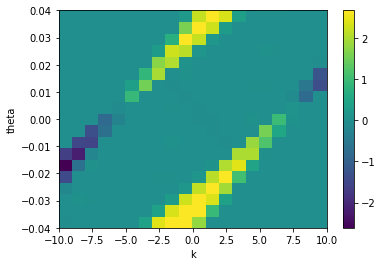

In [224]:
plt.pcolor(k_range, theta_range, A_mat); plt.colorbar();
plt.xlabel('k'); plt.ylabel('theta');